In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/siddharthsmac/Desktop/Project_AQI/Data/Real-Data/Real_Combine.csv')

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1] 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


/Users/siddharthsmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 342 samples, validate on 169 samples
Epoch 1/100
342/342 [==============================] - 0s 930us/step - loss: 72.8971 - mean_absolute_error: 72.8971 - val_loss: 62.6540 - val_mean_absolute_error: 62.6540
Epoch 2/100
342/342 [==============================] - 0s 193us/step - loss: 68.1000 - mean_absolute_error: 68.1000 - val_loss: 64.0346 - val_mean_absolute_error: 64.0346
Epoch 3/100
342/342 [==============================] - 0s 230us/step - loss: 69.7316 - mean_absolute_error: 69.7316 - val_loss: 68.9575 - val_mean_absolute_error: 68.9575
Epoch 4/100
342/342 [==============================] - 0s 176us/step - loss: 67.3862 - mean_absolute_error: 67.3862 - val_loss: 60.5127 - val_mean_absolute_error: 60.5127
Epoch 5/100
342/342 [==============================] - 0s 164us/step - loss: 64.4542 - mean_absolute_error: 64.4542 - val_loss: 62.2501 - val_mean_absolute_error: 62.2500
Epoch 6/100
342/342 [==============================] - 0s 165us/step - loss: 62.0061 - mean_absolu

In [18]:
predictions=NN_model.predict(X_test)

/Users/siddharthsmac/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


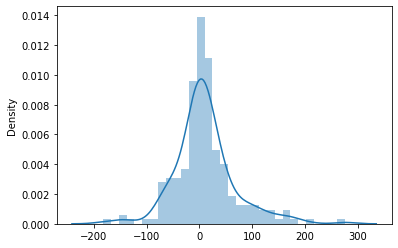

In [19]:
sns.distplot(y_test.values.reshape(-1,1)-predictions)

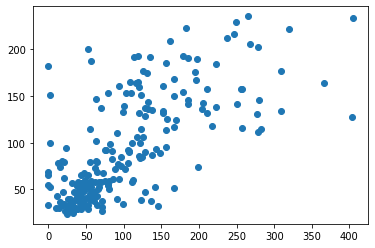

In [20]:
plt.scatter(y_test,predictions)

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 39.17456012592286
MSE: 3444.652190334712
RMSE: 58.691159388230794


In [23]:
import pickle

In [24]:
file = open('/Users/siddharthsmac/Desktop/Project_AQI/ANN_model.pkl', 'wb')

pickle.dump(model_history, file)